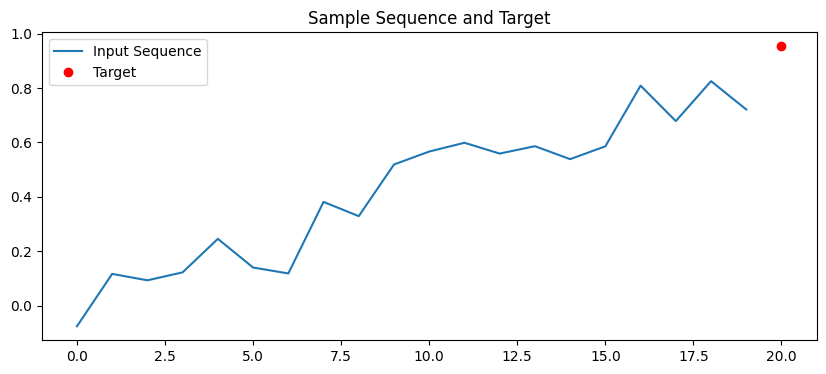

Inputs shape: (1980, 20)
Targets shape: (1980,)


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
seq_length = 20  # Length of each input sequence
num_sequences = 100  # Number of sequences
noise_level = 0.1  # Add some noise to the sine wave

# Generate a sine wave
x = np.linspace(0, 100, num_sequences * seq_length)
sine_wave = np.sin(x) + noise_level * np.random.randn(*x.shape)

# Create sequences and targets
input_sequences = []
target_values = []
for i in range(0, len(sine_wave) - seq_length):
    sequence = sine_wave[i:i + seq_length]
    target = sine_wave[i + seq_length]
    input_sequences.append(sequence)
    target_values.append(target)

# Convert to numpy arrays
inputs = np.array(input_sequences)
targets = np.array(target_values)

# Plotting a sample sequence and its target
plt.figure(figsize=(10, 4))
plt.plot(inputs[0], label='Input Sequence')
plt.plot(seq_length, targets[0], 'ro', label='Target')
plt.title('Sample Sequence and Target')
plt.legend()
plt.show()

# Check the shapes
print(f"Inputs shape: {inputs.shape}")
print(f"Targets shape: {targets.shape}")


In [5]:
targets[0]

np.float64(0.8287504217341207)

In [12]:
inputs[0]

array([-0.07627698,  0.11630329,  0.09275376,  0.12201589,  0.24528777,
        0.13978274,  0.11793534,  0.3809811 ,  0.328718  ,  0.51868583,
        0.56625821,  0.59849167,  0.55879584,  0.58587118,  0.53824063,
        0.58548738,  0.80858908,  0.67820918,  0.82501667,  0.72089376])

In [13]:
import torch.nn as nn
import torch

class mySimpleRNNModule(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.output_size = output_size
        self.input_to_hidden = nn.Linear(input_size, hidden_layer_size)
        self.hiddent_to_hidden = nn.Linear(hidden_layer_size, hidden_layer_size)
        self.hidden_to_output = nn.Linear(hidden_layer_size, output_size)
        

    def forward(self, input_sequence_batch, hidden_state):
        # input_sequence_batch shape: (batch_size, sequence_length)
        # hidden_state shape: (batch_size, hidden_layer_size)
        batch_size = input_sequence_batch.shape[0]
        sequence_length = input_sequence_batch.shape[1]
        for i in range(sequence_length):
            input = input_sequence_batch[:, i]
            hidden_linear = self.input_to_hidden(input) + self.hiddent_to_hidden(hidden_state)
            hidden_activation = torch.tanh(hidden_linear)
        output = self.hidden_to_output(hidden_activation)
        return output, hidden_state




In [14]:
## Test the model on inputs, targets

# Parameters
input_size = 1
hidden_layer_size = 100
output_size = 1

# Initialize the model
model = mySimpleRNNModule(input_size, hidden_layer_size, output_size)

# Initialize the hidden state
hidden_state = torch.zeros(1, hidden_layer_size)

# Convert inputs and targets to PyTorch tensors
inputs = torch.from_numpy(inputs).float()
targets = torch.from_numpy(targets).float()

# Get the output and hidden state
output, hidden_state = model(inputs[0].view(1, -1), hidden_state)

# Now let's forward pass the entire batch
output, hidden_state = model(inputs, hidden_state)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x1980 and 1x100)

In [9]:
output

tensor([[0.4335]], grad_fn=<AddmmBackward0>)